In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
pd.set_option('display.max_columns', None)
import io
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from IPython.display import Image, display, Math
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score, roc_curve
import seaborn as sns
%matplotlib inline

In [2]:
def visualize(tree_model):
    # Visualize decision tree.
    dot_data = io.StringIO()
    export_graphviz(tree_model, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

In [3]:
nRowsRead = 1000 # specify 'None' if want to read whole file
#nColumnsRead = 27
# 2009.csv has 6429338 rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('December2018.csv', usecols=[i for i in range(0,8)])
df.dataframeName = 'December2018.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df.head(10)

There are 593842 rows and 8 columns


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,2018,12,6,4,SNA,ATL,645,0.0
1,2018,12,6,4,AUS,ATL,700,0.0
2,2018,12,6,4,JFK,FLL,1133,0.0
3,2018,12,6,4,ATL,BDL,727,0.0
4,2018,12,6,4,BDL,ATL,1039,0.0
5,2018,12,6,4,ICT,ATL,557,0.0
6,2018,12,6,4,LGA,PBI,805,0.0
7,2018,12,6,4,DCA,ATL,1100,0.0
8,2018,12,6,4,VPS,ATL,600,0.0
9,2018,12,6,4,SFO,DTW,655,0.0


In [4]:
df = df.fillna({'ARR_DEL15': 1})
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].astype('float64')
df['CRS_DEP_TIME'] = np.floor(df['CRS_DEP_TIME'] / 100)

In [5]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ABE,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ALO,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ART,ORIGIN_ASE,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_AZA,ORIGIN_AZO,ORIGIN_BDL,ORIGIN_BET,ORIGIN_BFF,ORIGIN_BFL,ORIGIN_BGM,ORIGIN_BGR,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BJI,ORIGIN_BLI,ORIGIN_BLV,ORIGIN_BMI,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BPT,ORIGIN_BQK,ORIGIN_BQN,ORIGIN_BRD,ORIGIN_BRO,ORIGIN_BRW,ORIGIN_BTM,ORIGIN_BTR,ORIGIN_BTV,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_BZN,ORIGIN_CAE,ORIGIN_CAK,ORIGIN_CDC,ORIGIN_CDV,ORIGIN_CGI,ORIGIN_CHA,ORIGIN_CHO,ORIGIN_CHS,ORIGIN_CID,ORIGIN_CIU,ORIGIN_CKB,ORIGIN_CLE,ORIGIN_CLL,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_CMI,ORIGIN_CMX,ORIGIN_CNY,ORIGIN_COD,ORIGIN_COS,ORIGIN_COU,ORIGIN_CPR,ORIGIN_CRP,ORIGIN_CRW,ORIGIN_CSG,ORIGIN_CVG,ORIGIN_CWA,ORIGIN_CYS,ORIGIN_DAB,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DBQ,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DHN,ORIGIN_DLH,ORIGIN_DRO,ORIGIN_DRT,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_DVL,ORIGIN_EAR,ORIGIN_EAU,ORIGIN_ECP,ORIGIN_EGE,ORIGIN_EKO,ORIGIN_ELM,ORIGIN_ELP,ORIGIN_ERI,ORIGIN_ESC,ORIGIN_EUG,ORIGIN_EVV,ORIGIN_EWN,ORIGIN_EWR,ORIGIN_EYW,ORIGIN_FAI,ORIGIN_FAR,ORIGIN_FAT,ORIGIN_FAY,ORIGIN_FCA,ORIGIN_FLG,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_FSD,ORIGIN_FSM,ORIGIN_FWA,ORIGIN_GCC,ORIGIN_GCK,ORIGIN_GEG,ORIGIN_GFK,ORIGIN_GGG,ORIGIN_GJT,ORIGIN_GNV,ORIGIN_GPT,ORIGIN_GRB,ORIGIN_GRI,ORIGIN_GRK,ORIGIN_GRR,ORIGIN_GSO,ORIGIN_GSP,ORIGIN_GTF,ORIGIN_GTR,ORIGIN_GUC,ORIGIN_GUM,ORIGIN_HDN,ORIGIN_HGR,ORIGIN_HHH,ORIGIN_HIB,ORIGIN_HLN,ORIGIN_HNL,ORIGIN_HOB,ORIGIN_HOU,ORIGIN_HPN,ORIGIN_HRL,ORIGIN_HSV,ORIGIN_HTS,ORIGIN_HVN,ORIGIN_HYS,ORIGIN_IAD,ORIGIN_IAG,ORIGIN_IAH,ORIGIN_ICT,ORIGIN_IDA,ORIGIN_ILM,ORIGIN_IMT,ORIGIN_IND,ORIGIN_INL,ORIGIN_ISN,ORIGIN_ISP,ORIGIN_ITH,ORIGIN_ITO,ORIGIN_JAC,ORIGIN_JAN,ORIGIN_JAX,ORIGIN_JFK,ORIGIN_JLN,ORIGIN_JMS,ORIGIN_JNU,ORIGIN_KOA,ORIGIN_KTN,ORIGIN_LAN,ORIGIN_LAR,ORIGIN_LAS,ORIGIN_LAW,ORIGIN_LAX,ORIGIN_LBB,ORIGIN_LBE,ORIGIN_LBF,ORIGIN_LBL,ORIGIN_LCH,ORIGIN_LCK,ORIGIN_LEX,ORIGIN_LFT,ORIGIN_LGA,ORIGIN_LGB,ORIGIN_LIH,ORIGIN_LIT,ORIGIN_LNK,ORIGIN_LRD,ORIGIN_LSE,ORIGIN_LWB,ORIGIN_LWS,ORIGIN_LYH,ORIGIN_MAF,ORIGIN_MBS,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDT,ORIGIN_MDW,ORIGIN_MEI,ORIGIN_MEM,ORIGIN_MFE,ORIGIN_MFR,ORIGIN_MGM,ORIGIN_MHK,ORIGIN_MHT,ORIGIN_MIA,ORIGIN_MKE,ORIGIN_MKG,ORIGIN_MLB,ORIGIN_MLI,ORIGIN_MLU,ORIGIN_MMH,ORIGIN_MOB,ORIGIN_MOT,ORIGIN_MQT,ORIGIN_MRY,ORIGIN_MSN,ORIGIN_MSO,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_MTJ,ORIGIN_MYR,ORIGIN_OAJ,ORIGIN_OAK,ORIGIN_OGD,ORIGIN_OGG,ORIGIN_OGS,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_OME,ORIGIN_ONT,ORIGIN_ORD,ORIGIN_ORF,ORIGIN_ORH,ORIGIN_OTH,ORIGIN_OTZ,ORIGIN_OWB,ORIGIN_PAH,ORIGIN_PBG,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PGD,ORIGIN_PHF,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_PIA,ORIGIN_PIB,ORIGIN_PIE,ORIGIN_PIH,ORIGIN_PIT,ORIGIN_PLN,ORIGIN_PNS,ORIGIN_PPG,ORIGIN_PRC,ORIGIN_PSC,ORIGIN_PSE,ORIGIN_PSG,ORIGIN_PSM,ORIGIN_PSP,ORIGIN_PUB,ORIGIN_PVD,ORIGIN_PVU,ORIGIN_PWM,ORIGIN_RAP,ORIGIN_RDD,ORIGIN_RDM,ORIGIN_RDU,ORIGIN_RFD,ORIGIN_RHI,ORIGIN_RIC,ORIGIN_RKS,ORIGIN_RNO,ORIGIN_ROA,ORIGIN_ROC,ORIGIN_ROW,ORIGIN_RST,ORIGIN_RSW,ORIGIN_SAF,ORIGIN_SAN,ORIGIN_SAT,ORIGIN_SAV,ORIGIN_SBA,ORIGIN_SBN,ORIGIN_SBP,ORIGIN_SCC,ORIGIN_SCE,ORIGIN_SCK,ORIGIN_SDF,ORIGIN_SEA,ORIGIN_SFB,ORIGIN_SFO,ORIGIN_SGF,ORIGIN_SGU,ORIGIN_SHD,ORIGIN_SHV,ORIGIN_SIT,ORIGIN_SJC,ORIGIN_SJT,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SLN,ORIGIN_SMF,ORIGIN_SMX,ORIGIN_SNA,ORIGIN_SPI,ORIGIN_SPN,ORIGIN_SPS,ORIGIN_SRQ,ORIGIN_STC,ORIGIN_STL,ORIGIN_STS,ORIGIN_STT,ORIGIN_STX,ORIGIN_SUN,ORIGIN_SUX,ORIGIN_SWF,ORIGIN_SWO,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TOL,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TTN,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TWF,ORIGIN_TXK,ORIGIN_TYR,ORIGIN_TYS,ORIGIN_UIN,ORIGIN_USA,ORIGIN_VEL,ORIGIN_VLD,ORIGIN_VPS,ORIGIN_WRG,ORIGIN_XNA,ORIGIN_YAK,ORIGIN_YUM,DEST_ABE,DEST_ABI,DEST_ABQ,DEST_ABR,DEST_ABY,DEST_ACT,DEST_ACV,DEST_ACY,DEST_ADK,DEST_ADQ,DEST_AEX,DEST_AGS,DEST_ALB,DEST_ALO,DEST_AMA

In [6]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ABE,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ALO,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ART,ORIGIN_ASE,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_AZA,ORIGIN_AZO,ORIGIN_BDL,ORIGIN_BET,ORIGIN_BFF,ORIGIN_BFL,ORIGIN_BGM,ORIGIN_BGR,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BJI,ORIGIN_BLI,ORIGIN_BLV,ORIGIN_BMI,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BPT,ORIGIN_BQK,ORIGIN_BQN,ORIGIN_BRD,ORIGIN_BRO,ORIGIN_BRW,ORIGIN_BTM,ORIGIN_BTR,ORIGIN_BTV,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_BZN,ORIGIN_CAE,ORIGIN_CAK,ORIGIN_CDC,ORIGIN_CDV,ORIGIN_CGI,ORIGIN_CHA,ORIGIN_CHO,ORIGIN_CHS,ORIGIN_CID,ORIGIN_CIU,ORIGIN_CKB,ORIGIN_CLE,ORIGIN_CLL,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_CMI,ORIGIN_CMX,ORIGIN_CNY,ORIGIN_COD,ORIGIN_COS,ORIGIN_COU,ORIGIN_CPR,ORIGIN_CRP,ORIGIN_CRW,ORIGIN_CSG,ORIGIN_CVG,ORIGIN_CWA,ORIGIN_CYS,ORIGIN_DAB,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DBQ,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DHN,ORIGIN_DLH,ORIGIN_DRO,ORIGIN_DRT,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_DVL,ORIGIN_EAR,ORIGIN_EAU,ORIGIN_ECP,ORIGIN_EGE,ORIGIN_EKO,ORIGIN_ELM,ORIGIN_ELP,ORIGIN_ERI,ORIGIN_ESC,ORIGIN_EUG,ORIGIN_EVV,ORIGIN_EWN,ORIGIN_EWR,ORIGIN_EYW,ORIGIN_FAI,ORIGIN_FAR,ORIGIN_FAT,ORIGIN_FAY,ORIGIN_FCA,ORIGIN_FLG,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_FSD,ORIGIN_FSM,ORIGIN_FWA,ORIGIN_GCC,ORIGIN_GCK,ORIGIN_GEG,ORIGIN_GFK,ORIGIN_GGG,ORIGIN_GJT,ORIGIN_GNV,ORIGIN_GPT,ORIGIN_GRB,ORIGIN_GRI,ORIGIN_GRK,ORIGIN_GRR,ORIGIN_GSO,ORIGIN_GSP,ORIGIN_GTF,ORIGIN_GTR,ORIGIN_GUC,ORIGIN_GUM,ORIGIN_HDN,ORIGIN_HGR,ORIGIN_HHH,ORIGIN_HIB,ORIGIN_HLN,ORIGIN_HNL,ORIGIN_HOB,ORIGIN_HOU,ORIGIN_HPN,ORIGIN_HRL,ORIGIN_HSV,ORIGIN_HTS,ORIGIN_HVN,ORIGIN_HYS,ORIGIN_IAD,ORIGIN_IAG,ORIGIN_IAH,ORIGIN_ICT,ORIGIN_IDA,ORIGIN_ILM,ORIGIN_IMT,ORIGIN_IND,ORIGIN_INL,ORIGIN_ISN,ORIGIN_ISP,ORIGIN_ITH,ORIGIN_ITO,ORIGIN_JAC,ORIGIN_JAN,ORIGIN_JAX,ORIGIN_JFK,ORIGIN_JLN,ORIGIN_JMS,ORIGIN_JNU,ORIGIN_KOA,ORIGIN_KTN,ORIGIN_LAN,ORIGIN_LAR,ORIGIN_LAS,ORIGIN_LAW,ORIGIN_LAX,ORIGIN_LBB,ORIGIN_LBE,ORIGIN_LBF,ORIGIN_LBL,ORIGIN_LCH,ORIGIN_LCK,ORIGIN_LEX,ORIGIN_LFT,ORIGIN_LGA,ORIGIN_LGB,ORIGIN_LIH,ORIGIN_LIT,ORIGIN_LNK,ORIGIN_LRD,ORIGIN_LSE,ORIGIN_LWB,ORIGIN_LWS,ORIGIN_LYH,ORIGIN_MAF,ORIGIN_MBS,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDT,ORIGIN_MDW,ORIGIN_MEI,ORIGIN_MEM,ORIGIN_MFE,ORIGIN_MFR,ORIGIN_MGM,ORIGIN_MHK,ORIGIN_MHT,ORIGIN_MIA,ORIGIN_MKE,ORIGIN_MKG,ORIGIN_MLB,ORIGIN_MLI,ORIGIN_MLU,ORIGIN_MMH,ORIGIN_MOB,ORIGIN_MOT,ORIGIN_MQT,ORIGIN_MRY,ORIGIN_MSN,ORIGIN_MSO,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_MTJ,ORIGIN_MYR,ORIGIN_OAJ,ORIGIN_OAK,ORIGIN_OGD,ORIGIN_OGG,ORIGIN_OGS,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_OME,ORIGIN_ONT,ORIGIN_ORD,ORIGIN_ORF,ORIGIN_ORH,ORIGIN_OTH,ORIGIN_OTZ,ORIGIN_OWB,ORIGIN_PAH,ORIGIN_PBG,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PGD,ORIGIN_PHF,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_PIA,ORIGIN_PIB,ORIGIN_PIE,ORIGIN_PIH,ORIGIN_PIT,ORIGIN_PLN,ORIGIN_PNS,ORIGIN_PPG,ORIGIN_PRC,ORIGIN_PSC,ORIGIN_PSE,ORIGIN_PSG,ORIGIN_PSM,ORIGIN_PSP,ORIGIN_PUB,ORIGIN_PVD,ORIGIN_PVU,ORIGIN_PWM,ORIGIN_RAP,ORIGIN_RDD,ORIGIN_RDM,ORIGIN_RDU,ORIGIN_RFD,ORIGIN_RHI,ORIGIN_RIC,ORIGIN_RKS,ORIGIN_RNO,ORIGIN_ROA,ORIGIN_ROC,ORIGIN_ROW,ORIGIN_RST,ORIGIN_RSW,ORIGIN_SAF,ORIGIN_SAN,ORIGIN_SAT,ORIGIN_SAV,ORIGIN_SBA,ORIGIN_SBN,ORIGIN_SBP,ORIGIN_SCC,ORIGIN_SCE,ORIGIN_SCK,ORIGIN_SDF,ORIGIN_SEA,ORIGIN_SFB,ORIGIN_SFO,ORIGIN_SGF,ORIGIN_SGU,ORIGIN_SHD,ORIGIN_SHV,ORIGIN_SIT,ORIGIN_SJC,ORIGIN_SJT,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SLN,ORIGIN_SMF,ORIGIN_SMX,ORIGIN_SNA,ORIGIN_SPI,ORIGIN_SPN,ORIGIN_SPS,ORIGIN_SRQ,ORIGIN_STC,ORIGIN_STL,ORIGIN_STS,ORIGIN_STT,ORIGIN_STX,ORIGIN_SUN,ORIGIN_SUX,ORIGIN_SWF,ORIGIN_SWO,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TOL,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TTN,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TWF,ORIGIN_TXK,ORIGIN_TYR,ORIGIN_TYS,ORIGIN_UIN,ORIGIN_USA,ORIGIN_VEL,ORIGIN_VLD,ORIGIN_VPS,ORIGIN_WRG,ORIGIN_XNA,ORIGIN_YAK,ORIGIN_YUM,DEST_ABE,DEST_ABI,DEST_ABQ,DEST_ABR,DEST_ABY,DEST_ACT,DEST_ACV,DEST_ACY,DEST_ADK,DEST_ADQ,DEST_AEX,DEST_AGS,DEST_ALB,DEST_ALO,DEST_AMA

In [7]:

train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=25)

In [8]:
print(train_x.shape,test_x.shape)

(475073, 697) (118769, 697)


In [23]:
model = RandomForestClassifier(
                                n_estimators=500,
                                criterion='entropy',
                                max_depth=None,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0,
                                max_features='auto',
                                max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None,
                                bootstrap=True,
                                oob_score=False,
                                n_jobs=-1,
                                random_state=372,
                                verbose=0,
                                warm_start=False,
                                class_weight=None,
                                )
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=372, verbose=0,
                       warm_start=False)

In [13]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8151537859205685

In [24]:
probabilities = model.predict_proba(test_x)

In [25]:
# Best AUC: 0.73 - n_estimators=500
roc_auc_score(test_y, probabilities[:, 1])

0.7354150940378983

In [26]:
confusion_matrix(test_y, predicted)

array([[90038,  5304],
       [16650,  6777]])

In [27]:
train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9833586513311937

In [28]:
recall_score(train_y, train_predictions)

0.9221936589545844

In [29]:

sns.set()

Text(0, 0.5, 'True Positive Rate')

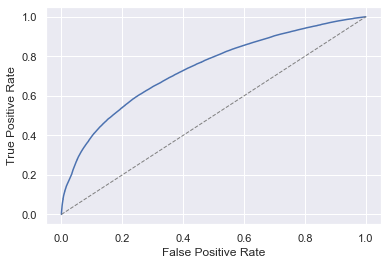

In [30]:
fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [31]:
# for col in df.columns:
#     print('\''+col+'\': 1 if origin == \''+col.replace('ORIGIN_','')+'\' else 0,')

In [32]:
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%m/%d/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    year = departure_date_time_parsed.year
    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input=[{'YEAR': year,
            'MONTH': month,
            'DAY': day,
            'DAY_OF_WEEK': day_of_week,
            'CRS_DEP_TIME': hour,
            'ORIGIN_ABE': 1 if origin == 'ABE' else 0,
            'ORIGIN_ABI': 1 if origin == 'ABI' else 0,
            'ORIGIN_ABQ': 1 if origin == 'ABQ' else 0,
            'ORIGIN_ABR': 1 if origin == 'ABR' else 0,
            'ORIGIN_ABY': 1 if origin == 'ABY' else 0,
            'ORIGIN_ACT': 1 if origin == 'ACT' else 0,
            'ORIGIN_ACV': 1 if origin == 'ACV' else 0,
            'ORIGIN_ACY': 1 if origin == 'ACY' else 0,
            'ORIGIN_ADK': 1 if origin == 'ADK' else 0,
            'ORIGIN_ADQ': 1 if origin == 'ADQ' else 0,
            'ORIGIN_AEX': 1 if origin == 'AEX' else 0,
            'ORIGIN_AGS': 1 if origin == 'AGS' else 0,
            'ORIGIN_ALB': 1 if origin == 'ALB' else 0,
            'ORIGIN_ALO': 1 if origin == 'ALO' else 0,
            'ORIGIN_AMA': 1 if origin == 'AMA' else 0,
            'ORIGIN_ANC': 1 if origin == 'ANC' else 0,
            'ORIGIN_APN': 1 if origin == 'APN' else 0,
            'ORIGIN_ART': 1 if origin == 'ART' else 0,
            'ORIGIN_ASE': 1 if origin == 'ASE' else 0,
            'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
            'ORIGIN_ATW': 1 if origin == 'ATW' else 0,
            'ORIGIN_AUS': 1 if origin == 'AUS' else 0,
            'ORIGIN_AVL': 1 if origin == 'AVL' else 0,
            'ORIGIN_AVP': 1 if origin == 'AVP' else 0,
            'ORIGIN_AZA': 1 if origin == 'AZA' else 0,
            'ORIGIN_AZO': 1 if origin == 'AZO' else 0,
            'ORIGIN_BDL': 1 if origin == 'BDL' else 0,
            'ORIGIN_BET': 1 if origin == 'BET' else 0,
            'ORIGIN_BFF': 1 if origin == 'BFF' else 0,
            'ORIGIN_BFL': 1 if origin == 'BFL' else 0,
            'ORIGIN_BGM': 1 if origin == 'BGM' else 0,
            'ORIGIN_BGR': 1 if origin == 'BGR' else 0,
            'ORIGIN_BHM': 1 if origin == 'BHM' else 0,
            'ORIGIN_BIL': 1 if origin == 'BIL' else 0,
            'ORIGIN_BIS': 1 if origin == 'BIS' else 0,
            'ORIGIN_BJI': 1 if origin == 'BJI' else 0,
            'ORIGIN_BLI': 1 if origin == 'BLI' else 0,
            'ORIGIN_BLV': 1 if origin == 'BLV' else 0,
            'ORIGIN_BMI': 1 if origin == 'BMI' else 0,
            'ORIGIN_BNA': 1 if origin == 'BNA' else 0,
            'ORIGIN_BOI': 1 if origin == 'BOI' else 0,
            'ORIGIN_BOS': 1 if origin == 'BOS' else 0,
            'ORIGIN_BPT': 1 if origin == 'BPT' else 0,
            'ORIGIN_BQK': 1 if origin == 'BQK' else 0,
            'ORIGIN_BQN': 1 if origin == 'BQN' else 0,
            'ORIGIN_BRD': 1 if origin == 'BRD' else 0,
            'ORIGIN_BRO': 1 if origin == 'BRO' else 0,
            'ORIGIN_BRW': 1 if origin == 'BRW' else 0,
            'ORIGIN_BTM': 1 if origin == 'BTM' else 0,
            'ORIGIN_BTR': 1 if origin == 'BTR' else 0,
            'ORIGIN_BTV': 1 if origin == 'BTV' else 0,
            'ORIGIN_BUF': 1 if origin == 'BUF' else 0,
            'ORIGIN_BUR': 1 if origin == 'BUR' else 0,
            'ORIGIN_BWI': 1 if origin == 'BWI' else 0,
            'ORIGIN_BZN': 1 if origin == 'BZN' else 0,
            'ORIGIN_CAE': 1 if origin == 'CAE' else 0,
            'ORIGIN_CAK': 1 if origin == 'CAK' else 0,
            'ORIGIN_CDC': 1 if origin == 'CDC' else 0,
            'ORIGIN_CDV': 1 if origin == 'CDV' else 0,
            'ORIGIN_CGI': 1 if origin == 'CGI' else 0,
            'ORIGIN_CHA': 1 if origin == 'CHA' else 0,
            'ORIGIN_CHO': 1 if origin == 'CHO' else 0,
            'ORIGIN_CHS': 1 if origin == 'CHS' else 0,
            'ORIGIN_CID': 1 if origin == 'CID' else 0,
            'ORIGIN_CIU': 1 if origin == 'CIU' else 0,
            'ORIGIN_CKB': 1 if origin == 'CKB' else 0,
            'ORIGIN_CLE': 1 if origin == 'CLE' else 0,
            'ORIGIN_CLL': 1 if origin == 'CLL' else 0,
            'ORIGIN_CLT': 1 if origin == 'CLT' else 0,
            'ORIGIN_CMH': 1 if origin == 'CMH' else 0,
            'ORIGIN_CMI': 1 if origin == 'CMI' else 0,
            'ORIGIN_CMX': 1 if origin == 'CMX' else 0,
            'ORIGIN_CNY': 1 if origin == 'CNY' else 0,
            'ORIGIN_COD': 1 if origin == 'COD' else 0,
            'ORIGIN_COS': 1 if origin == 'COS' else 0,
            'ORIGIN_COU': 1 if origin == 'COU' else 0,
            'ORIGIN_CPR': 1 if origin == 'CPR' else 0,
            'ORIGIN_CRP': 1 if origin == 'CRP' else 0,
            'ORIGIN_CRW': 1 if origin == 'CRW' else 0,
            'ORIGIN_CSG': 1 if origin == 'CSG' else 0,
            'ORIGIN_CVG': 1 if origin == 'CVG' else 0,
            'ORIGIN_CWA': 1 if origin == 'CWA' else 0,
            'ORIGIN_CYS': 1 if origin == 'CYS' else 0,
            'ORIGIN_DAB': 1 if origin == 'DAB' else 0,
            'ORIGIN_DAL': 1 if origin == 'DAL' else 0,
            'ORIGIN_DAY': 1 if origin == 'DAY' else 0,
            'ORIGIN_DBQ': 1 if origin == 'DBQ' else 0,
            'ORIGIN_DCA': 1 if origin == 'DCA' else 0,
            'ORIGIN_DEN': 1 if origin == 'DEN' else 0,
            'ORIGIN_DFW': 1 if origin == 'DFW' else 0,
            'ORIGIN_DHN': 1 if origin == 'DHN' else 0,
            'ORIGIN_DLH': 1 if origin == 'DLH' else 0,
            'ORIGIN_DRO': 1 if origin == 'DRO' else 0,
            'ORIGIN_DRT': 1 if origin == 'DRT' else 0,
            'ORIGIN_DSM': 1 if origin == 'DSM' else 0,
            'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
            'ORIGIN_DVL': 1 if origin == 'DVL' else 0,
            'ORIGIN_EAR': 1 if origin == 'EAR' else 0,
            'ORIGIN_EAU': 1 if origin == 'EAU' else 0,
            'ORIGIN_ECP': 1 if origin == 'ECP' else 0,
            'ORIGIN_EGE': 1 if origin == 'EGE' else 0,
            'ORIGIN_EKO': 1 if origin == 'EKO' else 0,
            'ORIGIN_ELM': 1 if origin == 'ELM' else 0,
            'ORIGIN_ELP': 1 if origin == 'ELP' else 0,
            'ORIGIN_ERI': 1 if origin == 'ERI' else 0,
            'ORIGIN_ESC': 1 if origin == 'ESC' else 0,
            'ORIGIN_EUG': 1 if origin == 'EUG' else 0,
            'ORIGIN_EVV': 1 if origin == 'EVV' else 0,
            'ORIGIN_EWN': 1 if origin == 'EWN' else 0,
            'ORIGIN_EWR': 1 if origin == 'EWR' else 0,
            'ORIGIN_EYW': 1 if origin == 'EYW' else 0,
            'ORIGIN_FAI': 1 if origin == 'FAI' else 0,
            'ORIGIN_FAR': 1 if origin == 'FAR' else 0,
            'ORIGIN_FAT': 1 if origin == 'FAT' else 0,
            'ORIGIN_FAY': 1 if origin == 'FAY' else 0,
            'ORIGIN_FCA': 1 if origin == 'FCA' else 0,
            'ORIGIN_FLG': 1 if origin == 'FLG' else 0,
            'ORIGIN_FLL': 1 if origin == 'FLL' else 0,
            'ORIGIN_FNT': 1 if origin == 'FNT' else 0,
            'ORIGIN_FSD': 1 if origin == 'FSD' else 0,
            'ORIGIN_FSM': 1 if origin == 'FSM' else 0,
            'ORIGIN_FWA': 1 if origin == 'FWA' else 0,
            'ORIGIN_GCC': 1 if origin == 'GCC' else 0,
            'ORIGIN_GCK': 1 if origin == 'GCK' else 0,
            'ORIGIN_GEG': 1 if origin == 'GEG' else 0,
            'ORIGIN_GFK': 1 if origin == 'GFK' else 0,
            'ORIGIN_GGG': 1 if origin == 'GGG' else 0,
            'ORIGIN_GJT': 1 if origin == 'GJT' else 0,
            'ORIGIN_GNV': 1 if origin == 'GNV' else 0,
            'ORIGIN_GPT': 1 if origin == 'GPT' else 0,
            'ORIGIN_GRB': 1 if origin == 'GRB' else 0,
            'ORIGIN_GRI': 1 if origin == 'GRI' else 0,
            'ORIGIN_GRK': 1 if origin == 'GRK' else 0,
            'ORIGIN_GRR': 1 if origin == 'GRR' else 0,
            'ORIGIN_GSO': 1 if origin == 'GSO' else 0,
            'ORIGIN_GSP': 1 if origin == 'GSP' else 0,
            'ORIGIN_GTF': 1 if origin == 'GTF' else 0,
            'ORIGIN_GTR': 1 if origin == 'GTR' else 0,
            'ORIGIN_GUC': 1 if origin == 'GUC' else 0,
            'ORIGIN_GUM': 1 if origin == 'GUM' else 0,
            'ORIGIN_HDN': 1 if origin == 'HDN' else 0,
            'ORIGIN_HGR': 1 if origin == 'HGR' else 0,
            'ORIGIN_HHH': 1 if origin == 'HHH' else 0,
            'ORIGIN_HIB': 1 if origin == 'HIB' else 0,
            'ORIGIN_HLN': 1 if origin == 'HLN' else 0,
            'ORIGIN_HNL': 1 if origin == 'HNL' else 0,
            'ORIGIN_HOB': 1 if origin == 'HOB' else 0,
            'ORIGIN_HOU': 1 if origin == 'HOU' else 0,
            'ORIGIN_HPN': 1 if origin == 'HPN' else 0,
            'ORIGIN_HRL': 1 if origin == 'HRL' else 0,
            'ORIGIN_HSV': 1 if origin == 'HSV' else 0,
            'ORIGIN_HTS': 1 if origin == 'HTS' else 0,
            'ORIGIN_HVN': 1 if origin == 'HVN' else 0,
            'ORIGIN_HYS': 1 if origin == 'HYS' else 0,
            'ORIGIN_IAD': 1 if origin == 'IAD' else 0,
            'ORIGIN_IAG': 1 if origin == 'IAG' else 0,
            'ORIGIN_IAH': 1 if origin == 'IAH' else 0,
            'ORIGIN_ICT': 1 if origin == 'ICT' else 0,
            'ORIGIN_IDA': 1 if origin == 'IDA' else 0,
            'ORIGIN_ILM': 1 if origin == 'ILM' else 0,
            'ORIGIN_IMT': 1 if origin == 'IMT' else 0,
            'ORIGIN_IND': 1 if origin == 'IND' else 0,
            'ORIGIN_INL': 1 if origin == 'INL' else 0,
            'ORIGIN_ISN': 1 if origin == 'ISN' else 0,
            'ORIGIN_ISP': 1 if origin == 'ISP' else 0,
            'ORIGIN_ITH': 1 if origin == 'ITH' else 0,
            'ORIGIN_ITO': 1 if origin == 'ITO' else 0,
            'ORIGIN_JAC': 1 if origin == 'JAC' else 0,
            'ORIGIN_JAN': 1 if origin == 'JAN' else 0,
            'ORIGIN_JAX': 1 if origin == 'JAX' else 0,
            'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
            'ORIGIN_JLN': 1 if origin == 'JLN' else 0,
            'ORIGIN_JMS': 1 if origin == 'JMS' else 0,
            'ORIGIN_JNU': 1 if origin == 'JNU' else 0,
            'ORIGIN_KOA': 1 if origin == 'KOA' else 0,
            'ORIGIN_KTN': 1 if origin == 'KTN' else 0,
            'ORIGIN_LAN': 1 if origin == 'LAN' else 0,
            'ORIGIN_LAR': 1 if origin == 'LAR' else 0,
            'ORIGIN_LAS': 1 if origin == 'LAS' else 0,
            'ORIGIN_LAW': 1 if origin == 'LAW' else 0,
            'ORIGIN_LAX': 1 if origin == 'LAX' else 0,
            'ORIGIN_LBB': 1 if origin == 'LBB' else 0,
            'ORIGIN_LBE': 1 if origin == 'LBE' else 0,
            'ORIGIN_LBF': 1 if origin == 'LBF' else 0,
            'ORIGIN_LBL': 1 if origin == 'LBL' else 0,
            'ORIGIN_LCH': 1 if origin == 'LCH' else 0,
            'ORIGIN_LCK': 1 if origin == 'LCK' else 0,
            'ORIGIN_LEX': 1 if origin == 'LEX' else 0,
            'ORIGIN_LFT': 1 if origin == 'LFT' else 0,
            'ORIGIN_LGA': 1 if origin == 'LGA' else 0,
            'ORIGIN_LGB': 1 if origin == 'LGB' else 0,
            'ORIGIN_LIH': 1 if origin == 'LIH' else 0,
            'ORIGIN_LIT': 1 if origin == 'LIT' else 0,
            'ORIGIN_LNK': 1 if origin == 'LNK' else 0,
            'ORIGIN_LRD': 1 if origin == 'LRD' else 0,
            'ORIGIN_LSE': 1 if origin == 'LSE' else 0,
            'ORIGIN_LWB': 1 if origin == 'LWB' else 0,
            'ORIGIN_LWS': 1 if origin == 'LWS' else 0,
            'ORIGIN_LYH': 1 if origin == 'LYH' else 0,
            'ORIGIN_MAF': 1 if origin == 'MAF' else 0,
            'ORIGIN_MBS': 1 if origin == 'MBS' else 0,
            'ORIGIN_MCI': 1 if origin == 'MCI' else 0,
            'ORIGIN_MCO': 1 if origin == 'MCO' else 0,
            'ORIGIN_MDT': 1 if origin == 'MDT' else 0,
            'ORIGIN_MDW': 1 if origin == 'MDW' else 0,
            'ORIGIN_MEI': 1 if origin == 'MEI' else 0,
            'ORIGIN_MEM': 1 if origin == 'MEM' else 0,
            'ORIGIN_MFE': 1 if origin == 'MFE' else 0,
            'ORIGIN_MFR': 1 if origin == 'MFR' else 0,
            'ORIGIN_MGM': 1 if origin == 'MGM' else 0,
            'ORIGIN_MHK': 1 if origin == 'MHK' else 0,
            'ORIGIN_MHT': 1 if origin == 'MHT' else 0,
            'ORIGIN_MIA': 1 if origin == 'MIA' else 0,
            'ORIGIN_MKE': 1 if origin == 'MKE' else 0,
            'ORIGIN_MKG': 1 if origin == 'MKG' else 0,
            'ORIGIN_MLB': 1 if origin == 'MLB' else 0,
            'ORIGIN_MLI': 1 if origin == 'MLI' else 0,
            'ORIGIN_MLU': 1 if origin == 'MLU' else 0,
            'ORIGIN_MMH': 1 if origin == 'MMH' else 0,
            'ORIGIN_MOB': 1 if origin == 'MOB' else 0,
            'ORIGIN_MOT': 1 if origin == 'MOT' else 0,
            'ORIGIN_MQT': 1 if origin == 'MQT' else 0,
            'ORIGIN_MRY': 1 if origin == 'MRY' else 0,
            'ORIGIN_MSN': 1 if origin == 'MSN' else 0,
            'ORIGIN_MSO': 1 if origin == 'MSO' else 0,
            'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
            'ORIGIN_MSY': 1 if origin == 'MSY' else 0,
            'ORIGIN_MTJ': 1 if origin == 'MTJ' else 0,
            'ORIGIN_MYR': 1 if origin == 'MYR' else 0,
            'ORIGIN_OAJ': 1 if origin == 'OAJ' else 0,
            'ORIGIN_OAK': 1 if origin == 'OAK' else 0,
            'ORIGIN_OGD': 1 if origin == 'OGD' else 0,
            'ORIGIN_OGG': 1 if origin == 'OGG' else 0,
            'ORIGIN_OGS': 1 if origin == 'OGS' else 0,
            'ORIGIN_OKC': 1 if origin == 'OKC' else 0,
            'ORIGIN_OMA': 1 if origin == 'OMA' else 0,
            'ORIGIN_OME': 1 if origin == 'OME' else 0,
            'ORIGIN_ONT': 1 if origin == 'ONT' else 0,
            'ORIGIN_ORD': 1 if origin == 'ORD' else 0,
            'ORIGIN_ORF': 1 if origin == 'ORF' else 0,
            'ORIGIN_ORH': 1 if origin == 'ORH' else 0,
            'ORIGIN_OTH': 1 if origin == 'OTH' else 0,
            'ORIGIN_OTZ': 1 if origin == 'OTZ' else 0,
            'ORIGIN_OWB': 1 if origin == 'OWB' else 0,
            'ORIGIN_PAH': 1 if origin == 'PAH' else 0,
            'ORIGIN_PBG': 1 if origin == 'PBG' else 0,
            'ORIGIN_PBI': 1 if origin == 'PBI' else 0,
            'ORIGIN_PDX': 1 if origin == 'PDX' else 0,
            'ORIGIN_PGD': 1 if origin == 'PGD' else 0,
            'ORIGIN_PHF': 1 if origin == 'PHF' else 0,
            'ORIGIN_PHL': 1 if origin == 'PHL' else 0,
            'ORIGIN_PHX': 1 if origin == 'PHX' else 0,
            'ORIGIN_PIA': 1 if origin == 'PIA' else 0,
            'ORIGIN_PIB': 1 if origin == 'PIB' else 0,
            'ORIGIN_PIE': 1 if origin == 'PIE' else 0,
            'ORIGIN_PIH': 1 if origin == 'PIH' else 0,
            'ORIGIN_PIT': 1 if origin == 'PIT' else 0,
            'ORIGIN_PLN': 1 if origin == 'PLN' else 0,
            'ORIGIN_PNS': 1 if origin == 'PNS' else 0,
            'ORIGIN_PPG': 1 if origin == 'PPG' else 0,
            'ORIGIN_PRC': 1 if origin == 'PRC' else 0,
            'ORIGIN_PSC': 1 if origin == 'PSC' else 0,
            'ORIGIN_PSE': 1 if origin == 'PSE' else 0,
            'ORIGIN_PSG': 1 if origin == 'PSG' else 0,
            'ORIGIN_PSM': 1 if origin == 'PSM' else 0,
            'ORIGIN_PSP': 1 if origin == 'PSP' else 0,
            'ORIGIN_PUB': 1 if origin == 'PUB' else 0,
            'ORIGIN_PVD': 1 if origin == 'PVD' else 0,
            'ORIGIN_PVU': 1 if origin == 'PVU' else 0,
            'ORIGIN_PWM': 1 if origin == 'PWM' else 0,
            'ORIGIN_RAP': 1 if origin == 'RAP' else 0,
            'ORIGIN_RDD': 1 if origin == 'RDD' else 0,
            'ORIGIN_RDM': 1 if origin == 'RDM' else 0,
            'ORIGIN_RDU': 1 if origin == 'RDU' else 0,
            'ORIGIN_RFD': 1 if origin == 'RFD' else 0,
            'ORIGIN_RHI': 1 if origin == 'RHI' else 0,
            'ORIGIN_RIC': 1 if origin == 'RIC' else 0,
            'ORIGIN_RKS': 1 if origin == 'RKS' else 0,
            'ORIGIN_RNO': 1 if origin == 'RNO' else 0,
            'ORIGIN_ROA': 1 if origin == 'ROA' else 0,
            'ORIGIN_ROC': 1 if origin == 'ROC' else 0,
            'ORIGIN_ROW': 1 if origin == 'ROW' else 0,
            'ORIGIN_RST': 1 if origin == 'RST' else 0,
            'ORIGIN_RSW': 1 if origin == 'RSW' else 0,
            'ORIGIN_SAF': 1 if origin == 'SAF' else 0,
            'ORIGIN_SAN': 1 if origin == 'SAN' else 0,
            'ORIGIN_SAT': 1 if origin == 'SAT' else 0,
            'ORIGIN_SAV': 1 if origin == 'SAV' else 0,
            'ORIGIN_SBA': 1 if origin == 'SBA' else 0,
            'ORIGIN_SBN': 1 if origin == 'SBN' else 0,
            'ORIGIN_SBP': 1 if origin == 'SBP' else 0,
            'ORIGIN_SCC': 1 if origin == 'SCC' else 0,
            'ORIGIN_SCE': 1 if origin == 'SCE' else 0,
            'ORIGIN_SCK': 1 if origin == 'SCK' else 0,
            'ORIGIN_SDF': 1 if origin == 'SDF' else 0,
            'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
            'ORIGIN_SFB': 1 if origin == 'SFB' else 0,
            'ORIGIN_SFO': 1 if origin == 'SFO' else 0,
            'ORIGIN_SGF': 1 if origin == 'SGF' else 0,
            'ORIGIN_SGU': 1 if origin == 'SGU' else 0,
            'ORIGIN_SHD': 1 if origin == 'SHD' else 0,
            'ORIGIN_SHV': 1 if origin == 'SHV' else 0,
            'ORIGIN_SIT': 1 if origin == 'SIT' else 0,
            'ORIGIN_SJC': 1 if origin == 'SJC' else 0,
            'ORIGIN_SJT': 1 if origin == 'SJT' else 0,
            'ORIGIN_SJU': 1 if origin == 'SJU' else 0,
            'ORIGIN_SLC': 1 if origin == 'SLC' else 0,
            'ORIGIN_SLN': 1 if origin == 'SLN' else 0,
            'ORIGIN_SMF': 1 if origin == 'SMF' else 0,
            'ORIGIN_SMX': 1 if origin == 'SMX' else 0,
            'ORIGIN_SNA': 1 if origin == 'SNA' else 0,
            'ORIGIN_SPI': 1 if origin == 'SPI' else 0,
            'ORIGIN_SPN': 1 if origin == 'SPN' else 0,
            'ORIGIN_SPS': 1 if origin == 'SPS' else 0,
            'ORIGIN_SRQ': 1 if origin == 'SRQ' else 0,
            'ORIGIN_STC': 1 if origin == 'STC' else 0,
            'ORIGIN_STL': 1 if origin == 'STL' else 0,
            'ORIGIN_STS': 1 if origin == 'STS' else 0,
            'ORIGIN_STT': 1 if origin == 'STT' else 0,
            'ORIGIN_STX': 1 if origin == 'STX' else 0,
            'ORIGIN_SUN': 1 if origin == 'SUN' else 0,
            'ORIGIN_SUX': 1 if origin == 'SUX' else 0,
            'ORIGIN_SWF': 1 if origin == 'SWF' else 0,
            'ORIGIN_SWO': 1 if origin == 'SWO' else 0,
            'ORIGIN_SYR': 1 if origin == 'SYR' else 0,
            'ORIGIN_TLH': 1 if origin == 'TLH' else 0,
            'ORIGIN_TOL': 1 if origin == 'TOL' else 0,
            'ORIGIN_TPA': 1 if origin == 'TPA' else 0,
            'ORIGIN_TRI': 1 if origin == 'TRI' else 0,
            'ORIGIN_TTN': 1 if origin == 'TTN' else 0,
            'ORIGIN_TUL': 1 if origin == 'TUL' else 0,
            'ORIGIN_TUS': 1 if origin == 'TUS' else 0,
            'ORIGIN_TVC': 1 if origin == 'TVC' else 0,
            'ORIGIN_TWF': 1 if origin == 'TWF' else 0,
            'ORIGIN_TXK': 1 if origin == 'TXK' else 0,
            'ORIGIN_TYR': 1 if origin == 'TYR' else 0,
            'ORIGIN_TYS': 1 if origin == 'TYS' else 0,
            'ORIGIN_UIN': 1 if origin == 'UIN' else 0,
            'ORIGIN_USA': 1 if origin == 'USA' else 0,
            'ORIGIN_VEL': 1 if origin == 'VEL' else 0,
            'ORIGIN_VLD': 1 if origin == 'VLD' else 0,
            'ORIGIN_VPS': 1 if origin == 'VPS' else 0,
            'ORIGIN_WRG': 1 if origin == 'WRG' else 0,
            'ORIGIN_XNA': 1 if origin == 'XNA' else 0,
            'ORIGIN_YAK': 1 if origin == 'YAK' else 0,
            'ORIGIN_YUM': 1 if origin == 'YUM' else 0,
            'DEST_ABE': 1 if destination == 'ABE' else 0,
            'DEST_ABI': 1 if destination == 'ABI' else 0,
            'DEST_ABQ': 1 if destination == 'ABQ' else 0,
            'DEST_ABR': 1 if destination == 'ABR' else 0,
            'DEST_ABY': 1 if destination == 'ABY' else 0,
            'DEST_ACT': 1 if destination == 'ACT' else 0,
            'DEST_ACV': 1 if destination == 'ACV' else 0,
            'DEST_ACY': 1 if destination == 'ACY' else 0,
            'DEST_ADK': 1 if destination == 'ADK' else 0,
            'DEST_ADQ': 1 if destination == 'ADQ' else 0,
            'DEST_AEX': 1 if destination == 'AEX' else 0,
            'DEST_AGS': 1 if destination == 'AGS' else 0,
            'DEST_ALB': 1 if destination == 'ALB' else 0,
            'DEST_ALO': 1 if destination == 'ALO' else 0,
            'DEST_AMA': 1 if destination == 'AMA' else 0,
            'DEST_ANC': 1 if destination == 'ANC' else 0,
            'DEST_APN': 1 if destination == 'APN' else 0,
            'DEST_ART': 1 if destination == 'ART' else 0,
            'DEST_ASE': 1 if destination == 'ASE' else 0,
            'DEST_ATL': 1 if destination == 'ATL' else 0,
            'DEST_ATW': 1 if destination == 'ATW' else 0,
            'DEST_AUS': 1 if destination == 'AUS' else 0,
            'DEST_AVL': 1 if destination == 'AVL' else 0,
            'DEST_AVP': 1 if destination == 'AVP' else 0,
            'DEST_AZA': 1 if destination == 'AZA' else 0,
            'DEST_AZO': 1 if destination == 'AZO' else 0,
            'DEST_BDL': 1 if destination == 'BDL' else 0,
            'DEST_BET': 1 if destination == 'BET' else 0,
            'DEST_BFF': 1 if destination == 'BFF' else 0,
            'DEST_BFL': 1 if destination == 'BFL' else 0,
            'DEST_BGM': 1 if destination == 'BGM' else 0,
            'DEST_BGR': 1 if destination == 'BGR' else 0,
            'DEST_BHM': 1 if destination == 'BHM' else 0,
            'DEST_BIL': 1 if destination == 'BIL' else 0,
            'DEST_BIS': 1 if destination == 'BIS' else 0,
            'DEST_BJI': 1 if destination == 'BJI' else 0,
            'DEST_BLI': 1 if destination == 'BLI' else 0,
            'DEST_BLV': 1 if destination == 'BLV' else 0,
            'DEST_BMI': 1 if destination == 'BMI' else 0,
            'DEST_BNA': 1 if destination == 'BNA' else 0,
            'DEST_BOI': 1 if destination == 'BOI' else 0,
            'DEST_BOS': 1 if destination == 'BOS' else 0,
            'DEST_BPT': 1 if destination == 'BPT' else 0,
            'DEST_BQK': 1 if destination == 'BQK' else 0,
            'DEST_BQN': 1 if destination == 'BQN' else 0,
            'DEST_BRD': 1 if destination == 'BRD' else 0,
            'DEST_BRO': 1 if destination == 'BRO' else 0,
            'DEST_BRW': 1 if destination == 'BRW' else 0,
            'DEST_BTM': 1 if destination == 'BTM' else 0,
            'DEST_BTR': 1 if destination == 'BTR' else 0,
            'DEST_BTV': 1 if destination == 'BTV' else 0,
            'DEST_BUF': 1 if destination == 'BUF' else 0,
            'DEST_BUR': 1 if destination == 'BUR' else 0,
            'DEST_BWI': 1 if destination == 'BWI' else 0,
            'DEST_BZN': 1 if destination == 'BZN' else 0,
            'DEST_CAE': 1 if destination == 'CAE' else 0,
            'DEST_CAK': 1 if destination == 'CAK' else 0,
            'DEST_CDC': 1 if destination == 'CDC' else 0,
            'DEST_CDV': 1 if destination == 'CDV' else 0,
            'DEST_CGI': 1 if destination == 'CGI' else 0,
            'DEST_CHA': 1 if destination == 'CHA' else 0,
            'DEST_CHO': 1 if destination == 'CHO' else 0,
            'DEST_CHS': 1 if destination == 'CHS' else 0,
            'DEST_CID': 1 if destination == 'CID' else 0,
            'DEST_CIU': 1 if destination == 'CIU' else 0,
            'DEST_CKB': 1 if destination == 'CKB' else 0,
            'DEST_CLE': 1 if destination == 'CLE' else 0,
            'DEST_CLL': 1 if destination == 'CLL' else 0,
            'DEST_CLT': 1 if destination == 'CLT' else 0,
            'DEST_CMH': 1 if destination == 'CMH' else 0,
            'DEST_CMI': 1 if destination == 'CMI' else 0,
            'DEST_CMX': 1 if destination == 'CMX' else 0,
            'DEST_CNY': 1 if destination == 'CNY' else 0,
            'DEST_COD': 1 if destination == 'COD' else 0,
            'DEST_COS': 1 if destination == 'COS' else 0,
            'DEST_COU': 1 if destination == 'COU' else 0,
            'DEST_CPR': 1 if destination == 'CPR' else 0,
            'DEST_CRP': 1 if destination == 'CRP' else 0,
            'DEST_CRW': 1 if destination == 'CRW' else 0,
            'DEST_CSG': 1 if destination == 'CSG' else 0,
            'DEST_CVG': 1 if destination == 'CVG' else 0,
            'DEST_CWA': 1 if destination == 'CWA' else 0,
            'DEST_CYS': 1 if destination == 'CYS' else 0,
            'DEST_DAB': 1 if destination == 'DAB' else 0,
            'DEST_DAL': 1 if destination == 'DAL' else 0,
            'DEST_DAY': 1 if destination == 'DAY' else 0,
            'DEST_DBQ': 1 if destination == 'DBQ' else 0,
            'DEST_DCA': 1 if destination == 'DCA' else 0,
            'DEST_DEN': 1 if destination == 'DEN' else 0,
            'DEST_DFW': 1 if destination == 'DFW' else 0,
            'DEST_DHN': 1 if destination == 'DHN' else 0,
            'DEST_DLH': 1 if destination == 'DLH' else 0,
            'DEST_DRO': 1 if destination == 'DRO' else 0,
            'DEST_DRT': 1 if destination == 'DRT' else 0,
            'DEST_DSM': 1 if destination == 'DSM' else 0,
            'DEST_DTW': 1 if destination == 'DTW' else 0,
            'DEST_DVL': 1 if destination == 'DVL' else 0,
            'DEST_EAR': 1 if destination == 'EAR' else 0,
            'DEST_EAU': 1 if destination == 'EAU' else 0,
            'DEST_ECP': 1 if destination == 'ECP' else 0,
            'DEST_EGE': 1 if destination == 'EGE' else 0,
            'DEST_EKO': 1 if destination == 'EKO' else 0,
            'DEST_ELM': 1 if destination == 'ELM' else 0,
            'DEST_ELP': 1 if destination == 'ELP' else 0,
            'DEST_ERI': 1 if destination == 'ERI' else 0,
            'DEST_ESC': 1 if destination == 'ESC' else 0,
            'DEST_EUG': 1 if destination == 'EUG' else 0,
            'DEST_EVV': 1 if destination == 'EVV' else 0,
            'DEST_EWN': 1 if destination == 'EWN' else 0,
            'DEST_EWR': 1 if destination == 'EWR' else 0,
            'DEST_EYW': 1 if destination == 'EYW' else 0,
            'DEST_FAI': 1 if destination == 'FAI' else 0,
            'DEST_FAR': 1 if destination == 'FAR' else 0,
            'DEST_FAT': 1 if destination == 'FAT' else 0,
            'DEST_FAY': 1 if destination == 'FAY' else 0,
            'DEST_FCA': 1 if destination == 'FCA' else 0,
            'DEST_FLG': 1 if destination == 'FLG' else 0,
            'DEST_FLL': 1 if destination == 'FLL' else 0,
            'DEST_FNT': 1 if destination == 'FNT' else 0,
            'DEST_FSD': 1 if destination == 'FSD' else 0,
            'DEST_FSM': 1 if destination == 'FSM' else 0,
            'DEST_FWA': 1 if destination == 'FWA' else 0,
            'DEST_GCC': 1 if destination == 'GCC' else 0,
            'DEST_GCK': 1 if destination == 'GCK' else 0,
            'DEST_GEG': 1 if destination == 'GEG' else 0,
            'DEST_GFK': 1 if destination == 'GFK' else 0,
            'DEST_GGG': 1 if destination == 'GGG' else 0,
            'DEST_GJT': 1 if destination == 'GJT' else 0,
            'DEST_GNV': 1 if destination == 'GNV' else 0,
            'DEST_GPT': 1 if destination == 'GPT' else 0,
            'DEST_GRB': 1 if destination == 'GRB' else 0,
            'DEST_GRI': 1 if destination == 'GRI' else 0,
            'DEST_GRK': 1 if destination == 'GRK' else 0,
            'DEST_GRR': 1 if destination == 'GRR' else 0,
            'DEST_GSO': 1 if destination == 'GSO' else 0,
            'DEST_GSP': 1 if destination == 'GSP' else 0,
            'DEST_GTF': 1 if destination == 'GTF' else 0,
            'DEST_GTR': 1 if destination == 'GTR' else 0,
            'DEST_GUC': 1 if destination == 'GUC' else 0,
            'DEST_GUM': 1 if destination == 'GUM' else 0,
            'DEST_HDN': 1 if destination == 'HDN' else 0,
            'DEST_HGR': 1 if destination == 'HGR' else 0,
            'DEST_HHH': 1 if destination == 'HHH' else 0,
            'DEST_HIB': 1 if destination == 'HIB' else 0,
            'DEST_HLN': 1 if destination == 'HLN' else 0,
            'DEST_HNL': 1 if destination == 'HNL' else 0,
            'DEST_HOB': 1 if destination == 'HOB' else 0,
            'DEST_HOU': 1 if destination == 'HOU' else 0,
            'DEST_HPN': 1 if destination == 'HPN' else 0,
            'DEST_HRL': 1 if destination == 'HRL' else 0,
            'DEST_HSV': 1 if destination == 'HSV' else 0,
            'DEST_HTS': 1 if destination == 'HTS' else 0,
            'DEST_HVN': 1 if destination == 'HVN' else 0,
            'DEST_HYS': 1 if destination == 'HYS' else 0,
            'DEST_IAD': 1 if destination == 'IAD' else 0,
            'DEST_IAG': 1 if destination == 'IAG' else 0,
            'DEST_IAH': 1 if destination == 'IAH' else 0,
            'DEST_ICT': 1 if destination == 'ICT' else 0,
            'DEST_IDA': 1 if destination == 'IDA' else 0,
            'DEST_ILM': 1 if destination == 'ILM' else 0,
            'DEST_IMT': 1 if destination == 'IMT' else 0,
            'DEST_IND': 1 if destination == 'IND' else 0,
            'DEST_INL': 1 if destination == 'INL' else 0,
            'DEST_ISN': 1 if destination == 'ISN' else 0,
            'DEST_ISP': 1 if destination == 'ISP' else 0,
            'DEST_ITH': 1 if destination == 'ITH' else 0,
            'DEST_ITO': 1 if destination == 'ITO' else 0,
            'DEST_JAC': 1 if destination == 'JAC' else 0,
            'DEST_JAN': 1 if destination == 'JAN' else 0,
            'DEST_JAX': 1 if destination == 'JAX' else 0,
            'DEST_JFK': 1 if destination == 'JFK' else 0,
            'DEST_JLN': 1 if destination == 'JLN' else 0,
            'DEST_JMS': 1 if destination == 'JMS' else 0,
            'DEST_JNU': 1 if destination == 'JNU' else 0,
            'DEST_KOA': 1 if destination == 'KOA' else 0,
            'DEST_KTN': 1 if destination == 'KTN' else 0,
            'DEST_LAN': 1 if destination == 'LAN' else 0,
            'DEST_LAR': 1 if destination == 'LAR' else 0,
            'DEST_LAS': 1 if destination == 'LAS' else 0,
            'DEST_LAW': 1 if destination == 'LAW' else 0,
            'DEST_LAX': 1 if destination == 'LAX' else 0,
            'DEST_LBB': 1 if destination == 'LBB' else 0,
            'DEST_LBE': 1 if destination == 'LBE' else 0,
            'DEST_LBF': 1 if destination == 'LBF' else 0,
            'DEST_LBL': 1 if destination == 'LBL' else 0,
            'DEST_LCH': 1 if destination == 'LCH' else 0,
            'DEST_LCK': 1 if destination == 'LCK' else 0,
            'DEST_LEX': 1 if destination == 'LEX' else 0,
            'DEST_LFT': 1 if destination == 'LFT' else 0,
            'DEST_LGA': 1 if destination == 'LGA' else 0,
            'DEST_LGB': 1 if destination == 'LGB' else 0,
            'DEST_LIH': 1 if destination == 'LIH' else 0,
            'DEST_LIT': 1 if destination == 'LIT' else 0,
            'DEST_LNK': 1 if destination == 'LNK' else 0,
            'DEST_LRD': 1 if destination == 'LRD' else 0,
            'DEST_LSE': 1 if destination == 'LSE' else 0,
            'DEST_LWB': 1 if destination == 'LWB' else 0,
            'DEST_LWS': 1 if destination == 'LWS' else 0,
            'DEST_LYH': 1 if destination == 'LYH' else 0,
            'DEST_MAF': 1 if destination == 'MAF' else 0,
            'DEST_MBS': 1 if destination == 'MBS' else 0,
            'DEST_MCI': 1 if destination == 'MCI' else 0,
            'DEST_MCO': 1 if destination == 'MCO' else 0,
            'DEST_MDT': 1 if destination == 'MDT' else 0,
            'DEST_MDW': 1 if destination == 'MDW' else 0,
            'DEST_MEI': 1 if destination == 'MEI' else 0,
            'DEST_MEM': 1 if destination == 'MEM' else 0,
            'DEST_MFE': 1 if destination == 'MFE' else 0,
            'DEST_MFR': 1 if destination == 'MFR' else 0,
            'DEST_MGM': 1 if destination == 'MGM' else 0,
            'DEST_MHK': 1 if destination == 'MHK' else 0,
            'DEST_MHT': 1 if destination == 'MHT' else 0,
            'DEST_MIA': 1 if destination == 'MIA' else 0,
            'DEST_MKE': 1 if destination == 'MKE' else 0,
            'DEST_MKG': 1 if destination == 'MKG' else 0,
            'DEST_MLB': 1 if destination == 'MLB' else 0,
            'DEST_MLI': 1 if destination == 'MLI' else 0,
            'DEST_MLU': 1 if destination == 'MLU' else 0,
            'DEST_MMH': 1 if destination == 'MMH' else 0,
            'DEST_MOB': 1 if destination == 'MOB' else 0,
            'DEST_MOT': 1 if destination == 'MOT' else 0,
            'DEST_MQT': 1 if destination == 'MQT' else 0,
            'DEST_MRY': 1 if destination == 'MRY' else 0,
            'DEST_MSN': 1 if destination == 'MSN' else 0,
            'DEST_MSO': 1 if destination == 'MSO' else 0,
            'DEST_MSP': 1 if destination == 'MSP' else 0,
            'DEST_MSY': 1 if destination == 'MSY' else 0,
            'DEST_MTJ': 1 if destination == 'MTJ' else 0,
            'DEST_MYR': 1 if destination == 'MYR' else 0,
            'DEST_OAJ': 1 if destination == 'OAJ' else 0,
            'DEST_OAK': 1 if destination == 'OAK' else 0,
            'DEST_OGD': 1 if destination == 'OGD' else 0,
            'DEST_OGG': 1 if destination == 'OGG' else 0,
            'DEST_OGS': 1 if destination == 'OGS' else 0,
            'DEST_OKC': 1 if destination == 'OKC' else 0,
            'DEST_OMA': 1 if destination == 'OMA' else 0,
            'DEST_OME': 1 if destination == 'OME' else 0,
            'DEST_ONT': 1 if destination == 'ONT' else 0,
            'DEST_ORD': 1 if destination == 'ORD' else 0,
            'DEST_ORF': 1 if destination == 'ORF' else 0,
            'DEST_ORH': 1 if destination == 'ORH' else 0,
            'DEST_OTH': 1 if destination == 'OTH' else 0,
            'DEST_OTZ': 1 if destination == 'OTZ' else 0,
            'DEST_OWB': 1 if destination == 'OWB' else 0,
            'DEST_PAH': 1 if destination == 'PAH' else 0,
            'DEST_PBG': 1 if destination == 'PBG' else 0,
            'DEST_PBI': 1 if destination == 'PBI' else 0,
            'DEST_PDX': 1 if destination == 'PDX' else 0,
            'DEST_PGD': 1 if destination == 'PGD' else 0,
            'DEST_PHF': 1 if destination == 'PHF' else 0,
            'DEST_PHL': 1 if destination == 'PHL' else 0,
            'DEST_PHX': 1 if destination == 'PHX' else 0,
            'DEST_PIA': 1 if destination == 'PIA' else 0,
            'DEST_PIB': 1 if destination == 'PIB' else 0,
            'DEST_PIE': 1 if destination == 'PIE' else 0,
            'DEST_PIH': 1 if destination == 'PIH' else 0,
            'DEST_PIT': 1 if destination == 'PIT' else 0,
            'DEST_PLN': 1 if destination == 'PLN' else 0,
            'DEST_PNS': 1 if destination == 'PNS' else 0,
            'DEST_PPG': 1 if destination == 'PPG' else 0,
            'DEST_PRC': 1 if destination == 'PRC' else 0,
            'DEST_PSC': 1 if destination == 'PSC' else 0,
            'DEST_PSE': 1 if destination == 'PSE' else 0,
            'DEST_PSG': 1 if destination == 'PSG' else 0,
            'DEST_PSM': 1 if destination == 'PSM' else 0,
            'DEST_PSP': 1 if destination == 'PSP' else 0,
            'DEST_PUB': 1 if destination == 'PUB' else 0,
            'DEST_PVD': 1 if destination == 'PVD' else 0,
            'DEST_PVU': 1 if destination == 'PVU' else 0,
            'DEST_PWM': 1 if destination == 'PWM' else 0,
            'DEST_RAP': 1 if destination == 'RAP' else 0,
            'DEST_RDD': 1 if destination == 'RDD' else 0,
            'DEST_RDM': 1 if destination == 'RDM' else 0,
            'DEST_RDU': 1 if destination == 'RDU' else 0,
            'DEST_RFD': 1 if destination == 'RFD' else 0,
            'DEST_RHI': 1 if destination == 'RHI' else 0,
            'DEST_RIC': 1 if destination == 'RIC' else 0,
            'DEST_RKS': 1 if destination == 'RKS' else 0,
            'DEST_RNO': 1 if destination == 'RNO' else 0,
            'DEST_ROA': 1 if destination == 'ROA' else 0,
            'DEST_ROC': 1 if destination == 'ROC' else 0,
            'DEST_ROW': 1 if destination == 'ROW' else 0,
            'DEST_RST': 1 if destination == 'RST' else 0,
            'DEST_RSW': 1 if destination == 'RSW' else 0,
            'DEST_SAF': 1 if destination == 'SAF' else 0,
            'DEST_SAN': 1 if destination == 'SAN' else 0,
            'DEST_SAT': 1 if destination == 'SAT' else 0,
            'DEST_SAV': 1 if destination == 'SAV' else 0,
            'DEST_SBA': 1 if destination == 'SBA' else 0,
            'DEST_SBN': 1 if destination == 'SBN' else 0,
            'DEST_SBP': 1 if destination == 'SBP' else 0,
            'DEST_SCC': 1 if destination == 'SCC' else 0,
            'DEST_SCE': 1 if destination == 'SCE' else 0,
            'DEST_SCK': 1 if destination == 'SCK' else 0,
            'DEST_SDF': 1 if destination == 'SDF' else 0,
            'DEST_SEA': 1 if destination == 'SEA' else 0,
            'DEST_SFB': 1 if destination == 'SFB' else 0,
            'DEST_SFO': 1 if destination == 'SFO' else 0,
            'DEST_SGF': 1 if destination == 'SGF' else 0,
            'DEST_SGU': 1 if destination == 'SGU' else 0,
            'DEST_SHD': 1 if destination == 'SHD' else 0,
            'DEST_SHV': 1 if destination == 'SHV' else 0,
            'DEST_SIT': 1 if destination == 'SIT' else 0,
            'DEST_SJC': 1 if destination == 'SJC' else 0,
            'DEST_SJT': 1 if destination == 'SJT' else 0,
            'DEST_SJU': 1 if destination == 'SJU' else 0,
            'DEST_SLC': 1 if destination == 'SLC' else 0,
            'DEST_SLN': 1 if destination == 'SLN' else 0,
            'DEST_SMF': 1 if destination == 'SMF' else 0,
            'DEST_SMX': 1 if destination == 'SMX' else 0,
            'DEST_SNA': 1 if destination == 'SNA' else 0,
            'DEST_SPI': 1 if destination == 'SPI' else 0,
            'DEST_SPN': 1 if destination == 'SPN' else 0,
            'DEST_SPS': 1 if destination == 'SPS' else 0,
            'DEST_SRQ': 1 if destination == 'SRQ' else 0,
            'DEST_STC': 1 if destination == 'STC' else 0,
            'DEST_STL': 1 if destination == 'STL' else 0,
            'DEST_STS': 1 if destination == 'STS' else 0,
            'DEST_STT': 1 if destination == 'STT' else 0,
            'DEST_STX': 1 if destination == 'STX' else 0,
            'DEST_SUN': 1 if destination == 'SUN' else 0,
            'DEST_SUX': 1 if destination == 'SUX' else 0,
            'DEST_SWF': 1 if destination == 'SWF' else 0,
            'DEST_SWO': 1 if destination == 'SWO' else 0,
            'DEST_SYR': 1 if destination == 'SYR' else 0,
            'DEST_TLH': 1 if destination == 'TLH' else 0,
            'DEST_TOL': 1 if destination == 'TOL' else 0,
            'DEST_TPA': 1 if destination == 'TPA' else 0,
            'DEST_TRI': 1 if destination == 'TRI' else 0,
            'DEST_TTN': 1 if destination == 'TTN' else 0,
            'DEST_TUL': 1 if destination == 'TUL' else 0,
            'DEST_TUS': 1 if destination == 'TUS' else 0,
            'DEST_TVC': 1 if destination == 'TVC' else 0,
            'DEST_TWF': 1 if destination == 'TWF' else 0,
            'DEST_TXK': 1 if destination == 'TXK' else 0,
            'DEST_TYR': 1 if destination == 'TYR' else 0,
            'DEST_TYS': 1 if destination == 'TYS' else 0,
            'DEST_UIN': 1 if destination == 'UIN' else 0,
            'DEST_USA': 1 if destination == 'USA' else 0,
            'DEST_VEL': 1 if destination == 'VEL' else 0,
            'DEST_VLD': 1 if destination == 'VLD' else 0,
            'DEST_VPS': 1 if destination == 'VPS' else 0,
            'DEST_WRG': 1 if destination == 'WRG' else 0,
            'DEST_XNA': 1 if destination == 'XNA' else 0,
            'DEST_YAK': 1 if destination == 'YAK' else 0,
            'DEST_YUM': 1 if destination == 'YUM' else 0,
             }]

    return model.predict_proba(pd.DataFrame(input))[0][1]

In [33]:
predict_delay('12/24/2019 13:40:00', 'ASE', 'IAH')

0.876

In [34]:
predict_delay('2/10/2018 13:45:00', 'HNL', 'SFO')

0.172

In [35]:
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

0.09933333333333333

(0.0, 1.0)

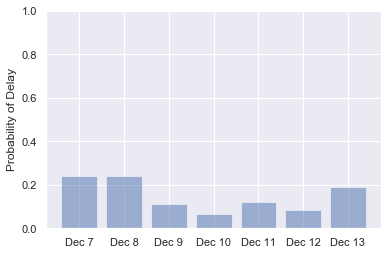

In [40]:
import numpy as np

labels = ('Dec 7', 'Dec 8', 'Dec 9', 'Dec 10', 'Dec 11', 'Dec 12', 'Dec 13')
values = (predict_delay('12/1/2019 21:45:00', 'HNL', 'PDX'),
          predict_delay('12/2/2019 21:45:00', 'HNL', 'PDX'),
          predict_delay('12/3/2019 21:45:00', 'HNL', 'PDX'),
          predict_delay('12/4/2019 21:45:00', 'HNL', 'PDX'),
          predict_delay('12/5/2019 21:45:00', 'HNL', 'PDX'),
          predict_delay('12/6/2019 21:45:00', 'HNL', 'PDX'),
          predict_delay('12/7/2019 21:45:00', 'HNL', 'PDX'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of Delay')
plt.ylim((0.0, 1.0))

(0.0, 1.0)

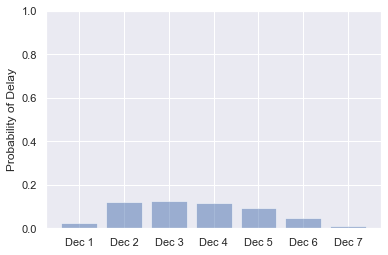

In [37]:
import numpy as np

labels = ('Dec 1', 'Dec 2', 'Dec 3', 'Dec 4', 'Dec 5', 'Dec 6', 'Dec 7')
values = (predict_delay('12/1/2019 21:45:00', 'HNL', 'SFO'),
          predict_delay('12/2/2019 21:45:00', 'HNL', 'SFO'),
          predict_delay('12/3/2019 21:45:00', 'HNL', 'SFO'),
          predict_delay('12/4/2019 21:45:00', 'HNL', 'SFO'),
          predict_delay('12/5/2019 21:45:00', 'HNL', 'SFO'),
          predict_delay('12/6/2019 21:45:00', 'HNL', 'SFO'),
          predict_delay('12/7/2019 21:45:00', 'HNL', 'SFO'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of Delay')
plt.ylim((0.0, 1.0))

(0.0, 1.0)

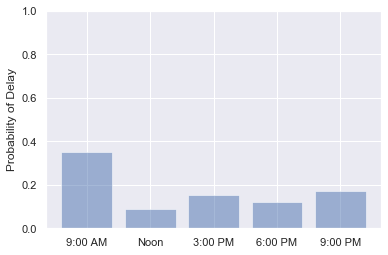

In [38]:
labels = ('9:00 AM', 'Noon', '3:00 PM', '6:00 PM', '9:00 PM')
values = (predict_delay('12/1/2019 09:00:00', 'SEA', 'ATL'),
          predict_delay('12/1/2019 12:00:00', 'SEA', 'ATL'),
          predict_delay('12/1/2019 15:00:00', 'SEA', 'ATL'),
          predict_delay('12/1/2019 18:00:00', 'SEA', 'ATL'),
          predict_delay('12/1/2019 21:00:00', 'SEA', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of Delay')
plt.ylim((0.0, 1.0))